# NLTK PROCESS

## Dependances

In [104]:
import re
import os 
import sys
from urllib.request import urlopen
import requests
import pprint
import math


In [105]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.grammar import DependencyGrammar
from nltk.parse import CoreNLPParser



In [106]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [107]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [108]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [109]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'The oxygen tanks are made of lnconel (a nickelsteel alloy) and are a little over 26 inches in diameter.\nThe cryogenic (ultra low temperature) tanks supply oxygen to the environmental control subsystem and oxygen and hydrogen to the fuel cell powerplants.\nThe fuel sump tank occupies almost all of the space with the sector.\nThe Eagles are not going to the super bowl this year.\nHow do I purge the oxygen fuel cell lines?\nWhich do I use to shutoff the fuel cell powerplant?'

### from url

In [110]:
# url = "https://www.hq.nasa.gov/alsj/LM03_Apollo_Spacecraft_AS1-6.pdf"
# # html = urlopen(url).read()

# html= requests.get(url)


# text = BeautifulSoup(html.text, 'html.parser').get_text()
# text[:200]

## Text Pre-processing

### Sentence tokenizing:

In [111]:
sentences=sent_tokenize(text)
console.print(f'Number of sentences:{len(sentences)}')

console.print(sentences,style="bold blue on white")

Number of sentences:6

[
    'The oxygen tanks are made of lnconel (a nickelsteel alloy) and are a little over 26 
inches in diameter.',
    'The cryogenic (ultra low temperature) tanks supply oxygen to the environmental control 
subsystem and oxygen and hydrogen to the fuel cell powerplants.',
    'The fuel sump tank occupies almost all of the space with the sector.',
    'The Eagles are not going to the super bowl this year.',
    'How do I purge the oxygen fuel cell lines?',
    'Which do I use to shutoff the fuel cell powerplant?'
]

### Word tokenizing

In [112]:
words=word_tokenize(text)
console.print(f'Number of words: {len(words)}')

print(words)

Number of words: 94

['The', 'oxygen', 'tanks', 'are', 'made', 'of', 'lnconel', '(', 'a', 'nickelsteel', 'alloy', ')', 'and', 'are', 'a', 'little', 'over', '26', 'inches', 'in', 'diameter', '.', 'The', 'cryogenic', '(', 'ultra', 'low', 'temperature', ')', 'tanks', 'supply', 'oxygen', 'to', 'the', 'environmental', 'control', 'subsystem', 'and', 'oxygen', 'and', 'hydrogen', 'to', 'the', 'fuel', 'cell', 'powerplants', '.', 'The', 'fuel', 'sump', 'tank', 'occupies', 'almost', 'all', 'of', 'the', 'space', 'with', 'the', 'sector', '.', 'The', 'Eagles', 'are', 'not', 'going', 'to', 'the', 'super', 'bowl', 'this', 'year', '.', 'How', 'do', 'I', 'purge', 'the', 'oxygen', 'fuel', 'cell', 'lines', '?', 'Which', 'do', 'I', 'use', 'to', 'shutoff', 'the', 'fuel', 'cell', 'powerplant', '?']


### Find the frequency distribution

In [113]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('the', 7),
 ('The', 4),
 ('oxygen', 4),
 ('.', 4),
 ('to', 4),
 ('fuel', 4),
 ('are', 3),
 ('and', 3),
 ('cell', 3),
 ('tanks', 2)]

### Plot the frequency graph

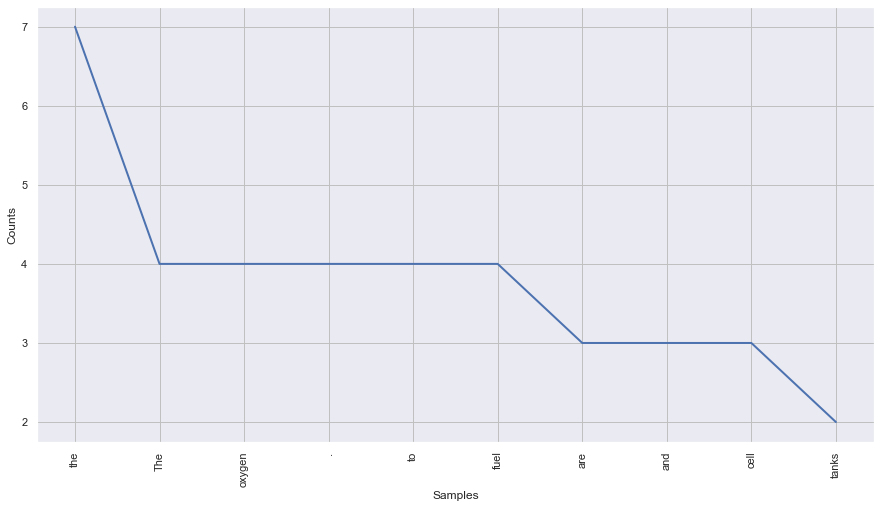

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [114]:
import matplotlib.pyplot as plt

fdist.plot(10)

### Remove punctuation marks

In [115]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['The', 'oxygen', 'tanks', 'are', 'made', 'of', 'lnconel', 'a', 'nickelsteel', 'alloy', 'and', 'are', 'a', 'little', 'over', 'inches', 'in', 'diameter', 'The', 'cryogenic', 'ultra', 'low', 'temperature', 'tanks', 'supply', 'oxygen', 'to', 'the', 'environmental', 'control', 'subsystem', 'and', 'oxygen', 'and', 'hydrogen', 'to', 'the', 'fuel', 'cell', 'powerplants', 'The', 'fuel', 'sump', 'tank', 'occupies', 'almost', 'all', 'of', 'the', 'space']
83


### Plotting graph without punctuation marks

In [116]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('the', 7),
 ('The', 4),
 ('oxygen', 4),
 ('to', 4),
 ('fuel', 4),
 ('are', 3),
 ('and', 3),
 ('cell', 3),
 ('tanks', 2),
 ('of', 2)]

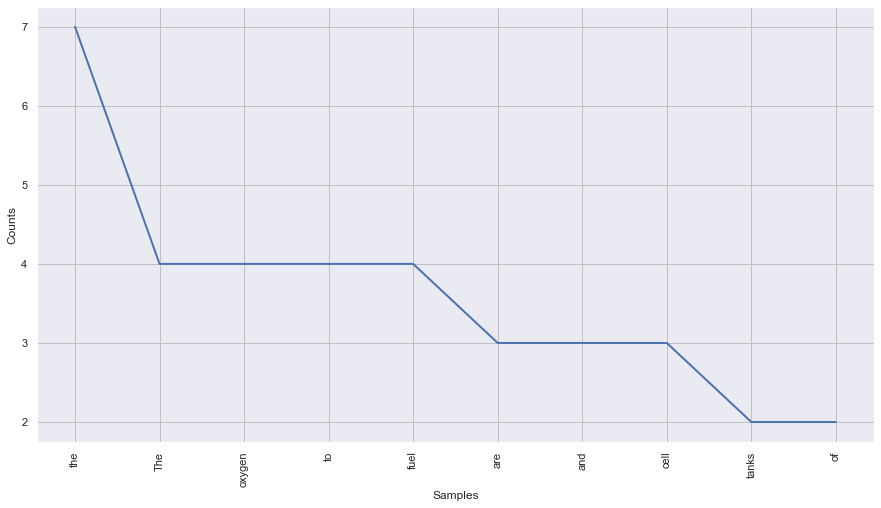

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [117]:
fdist.plot(10)

### List of stopwords

In [118]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Removing stopwords

In [119]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['The', 'oxygen', 'tanks', 'made', 'lnconel', 'nickelsteel', 'alloy', 'little', 'inches', 'diameter', 'The', 'cryogenic', 'ultra', 'low', 'temperature', 'tanks', 'supply', 'oxygen', 'environmental', 'control', 'subsystem', 'oxygen', 'hydrogen', 'fuel', 'cell', 'powerplants', 'The', 'fuel', 'sump', 'tank', 'occupies', 'almost', 'space', 'sector', 'The', 'Eagles', 'going', 'super', 'bowl', 'year', 'How', 'I', 'purge', 'oxygen', 'fuel', 'cell', 'lines', 'Which', 'I', 'use', 'shutoff', 'fuel', 'cell', 'powerplant']
54


### Final frequency distribution

In [120]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('The', 4),
 ('oxygen', 4),
 ('fuel', 4),
 ('cell', 3),
 ('tanks', 2),
 ('I', 2),
 ('made', 1),
 ('lnconel', 1),
 ('nickelsteel', 1),
 ('alloy', 1)]

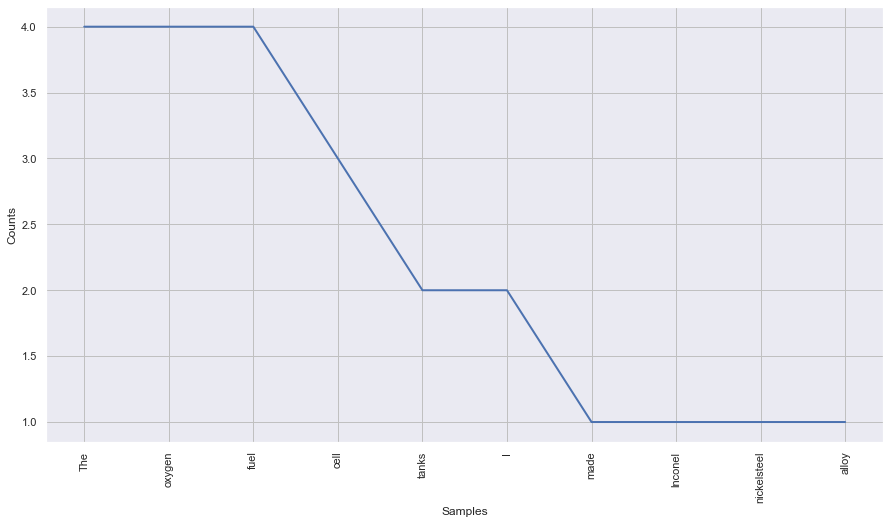

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [121]:
fdist.plot(10)

## Word Cloud

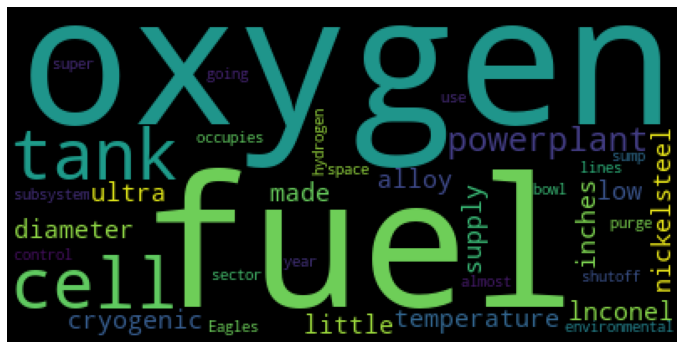

In [122]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [123]:
clean_words_joined=' '.join(clean_words)

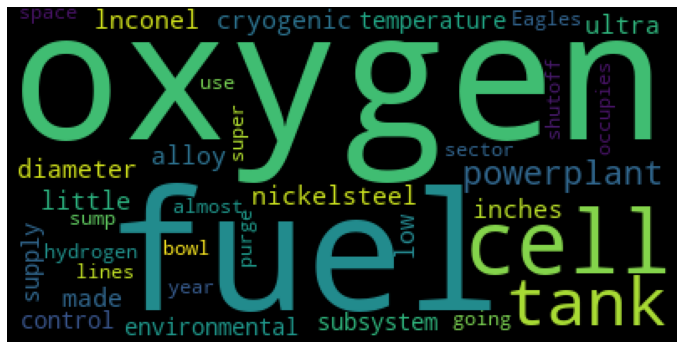

In [124]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [125]:
wordcloud.words_

{'oxygen': 1.0,
 'fuel': 1.0,
 'cell': 0.75,
 'tank': 0.75,
 'powerplant': 0.5,
 'made': 0.25,
 'lnconel': 0.25,
 'nickelsteel': 0.25,
 'alloy': 0.25,
 'little': 0.25,
 'inches': 0.25,
 'diameter': 0.25,
 'cryogenic': 0.25,
 'ultra': 0.25,
 'low': 0.25,
 'temperature': 0.25,
 'supply': 0.25,
 'environmental': 0.25,
 'control': 0.25,
 'subsystem': 0.25,
 'hydrogen': 0.25,
 'sump': 0.25,
 'occupies': 0.25,
 'almost': 0.25,
 'space': 0.25,
 'sector': 0.25,
 'Eagles': 0.25,
 'going': 0.25,
 'super': 0.25,
 'bowl': 0.25,
 'year': 0.25,
 'purge': 0.25,
 'lines': 0.25,
 'use': 0.25,
 'shutoff': 0.25}

## Stemming

In [126]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

# word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']
word_list=words

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

['the', 'oxygen', 'tank', 'are', 'made', 'of', 'lnconel', '(', 'a', 'nickelsteel', 'alloy', ')', 'and', 'are', 'a', 'littl', 'over', '26', 'inch', 'in', 'diamet', '.', 'the', 'cryogen', '(', 'ultra', 'low', 'temperatur', ')', 'tank', 'suppli', 'oxygen', 'to', 'the', 'environment', 'control', 'subsystem', 'and', 'oxygen', 'and', 'hydrogen', 'to', 'the', 'fuel', 'cell', 'powerpl', '.', 'the', 'fuel', 'sump', 'tank', 'occupi', 'almost', 'all', 'of', 'the', 'space', 'with', 'the', 'sector', '.', 'the', 'eagl', 'are', 'not', 'go', 'to', 'the', 'super', 'bowl', 'thi', 'year', '.', 'how', 'do', 'I', 'purg', 'the', 'oxygen', 'fuel', 'cell', 'line', '?', 'which', 'do', 'I', 'use', 'to', 'shutoff', 'the', 'fuel', 'cell', 'powerpl', '?']


## Lemmatization

In [127]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

word_list--->['The', 'oxygen', 'tanks', 'are', 'made', 'of', 'lnconel', '(', 'a', 'nickelsteel', 'alloy', ')', 'and', 'are', 'a', 'little', 'over', '26', 'inches', 'in', 'diameter', '.', 'The', 'cryogenic', '(', 'ultra', 'low', 'temperature', ')', 'tanks', 'supply', 'oxygen', 'to', 'the', 'environmental', 'control', 'subsystem', 'and', 'oxygen', 'and', 'hydrogen', 'to', 'the', 'fuel', 'cell', 'powerplants', '.', 'The', 'fuel', 'sump', 'tank', 'occupies', 'almost', 'all', 'of', 'the', 'space', 'with', 'the', 'sector', '.', 'The', 'Eagles', 'are', 'not', 'going', 'to', 'the', 'super', 'bowl', 'this', 'year', '.', 'How', 'do', 'I', 'purge', 'the', 'oxygen', 'fuel', 'cell', 'lines', '?', 'Which', 'do', 'I', 'use', 'to', 'shutoff', 'the', 'fuel', 'cell', 'powerplant', '?']
 POS:v
['The', 'oxygen', 'tank', 'be', 'make', 'of', 'lnconel', '(', 'a', 'nickelsteel', 'alloy', ')', 'and', 'be', 'a', 'little', 'over', '26', 'inch', 'in', 'diameter', '.', 'The', 'cryogenic', '(', 'ultra', 'low', 'tem

## Part of Speech Tagging (PoS tagging)

In [128]:
tagged_words=nltk.pos_tag(word_list)
print(tagged_words)

[('The', 'DT'), ('oxygen', 'NN'), ('tanks', 'NNS'), ('are', 'VBP'), ('made', 'VBN'), ('of', 'IN'), ('lnconel', 'NN'), ('(', '('), ('a', 'DT'), ('nickelsteel', 'RB'), ('alloy', 'NN'), (')', ')'), ('and', 'CC'), ('are', 'VBP'), ('a', 'DT'), ('little', 'JJ'), ('over', 'IN'), ('26', 'CD'), ('inches', 'NNS'), ('in', 'IN'), ('diameter', 'NN'), ('.', '.'), ('The', 'DT'), ('cryogenic', 'NN'), ('(', '('), ('ultra', 'JJ'), ('low', 'JJ'), ('temperature', 'NN'), (')', ')'), ('tanks', 'NNS'), ('supply', 'VBP'), ('oxygen', 'NN'), ('to', 'TO'), ('the', 'DT'), ('environmental', 'JJ'), ('control', 'NN'), ('subsystem', 'NN'), ('and', 'CC'), ('oxygen', 'NN'), ('and', 'CC'), ('hydrogen', 'NN'), ('to', 'TO'), ('the', 'DT'), ('fuel', 'NN'), ('cell', 'NN'), ('powerplants', 'NNS'), ('.', '.'), ('The', 'DT'), ('fuel', 'NN'), ('sump', 'NN'), ('tank', 'NN'), ('occupies', 'VBZ'), ('almost', 'RB'), ('all', 'DT'), ('of', 'IN'), ('the', 'DT'), ('space', 'NN'), ('with', 'IN'), ('the', 'DT'), ('sector', 'NN'), ('.', '

In [129]:
# sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'
# sentence=text

# tokenized_words=word_tokenize(sentence)

# tagged_words=nltk.pos_tag(tokenized_words)

# tagged_words

## Chunking

In [130]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP The/DT oxygen/NN)
  tanks/NNS
  are/VBP
  made/VBN
  of/IN
  (NP lnconel/NN)
  (/(
  a/DT
  nickelsteel/RB
  (NP alloy/NN)
  )/)
  and/CC
  are/VBP
  a/DT
  little/JJ
  over/IN
  26/CD
  inches/NNS
  in/IN
  (NP diameter/NN)
  ./.
  (NP The/DT cryogenic/NN)
  (/(
  (NP ultra/JJ low/JJ temperature/NN)
  )/)
  tanks/NNS
  supply/VBP
  (NP oxygen/NN)
  to/TO
  (NP the/DT environmental/JJ control/NN)
  (NP subsystem/NN)
  and/CC
  (NP oxygen/NN)
  and/CC
  (NP hydrogen/NN)
  to/TO
  (NP the/DT fuel/NN)
  (NP cell/NN)
  powerplants/NNS
  ./.
  (NP The/DT fuel/NN)
  (NP sump/NN)
  (NP tank/NN)
  occupies/VBZ
  almost/RB
  all/DT
  of/IN
  (NP the/DT space/NN)
  with/IN
  (NP the/DT sector/NN)
  ./.
  The/DT
  Eagles/NNPS
  are/VBP
  not/RB
  going/VBG
  to/TO
  (NP the/DT super/JJ bowl/NN)
  (NP this/DT year/NN)
  ./.
  How/WRB
  do/VBP
  I/PRP
  purge/VB
  (NP the/DT oxygen/NN)
  (NP fuel/NN)
  (NP cell/NN)
  lines/NNS
  ?/.
  Which/NNP
  do/VBP
  I/PRP
  use/VB
  to/TO
  shutoff/V

## Chinking

In [131]:
grammar=r"""NP : {<.*>+}
}<JJ>+{"""
parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP
    The/DT
    oxygen/NN
    tanks/NNS
    are/VBP
    made/VBN
    of/IN
    lnconel/NN
    (/(
    a/DT
    nickelsteel/RB
    alloy/NN
    )/)
    and/CC
    are/VBP
    a/DT)
  little/JJ
  (NP
    over/IN
    26/CD
    inches/NNS
    in/IN
    diameter/NN
    ./.
    The/DT
    cryogenic/NN
    (/()
  ultra/JJ
  low/JJ
  (NP temperature/NN )/) tanks/NNS supply/VBP oxygen/NN to/TO the/DT)
  environmental/JJ
  (NP
    control/NN
    subsystem/NN
    and/CC
    oxygen/NN
    and/CC
    hydrogen/NN
    to/TO
    the/DT
    fuel/NN
    cell/NN
    powerplants/NNS
    ./.
    The/DT
    fuel/NN
    sump/NN
    tank/NN
    occupies/VBZ
    almost/RB
    all/DT
    of/IN
    the/DT
    space/NN
    with/IN
    the/DT
    sector/NN
    ./.
    The/DT
    Eagles/NNPS
    are/VBP
    not/RB
    going/VBG
    to/TO
    the/DT)
  super/JJ
  (NP
    bowl/NN
    this/DT
    year/NN
    ./.
    How/WRB
    do/VBP
    I/PRP
    purge/VB
    the/DT
    oxygen/NN
    fuel/NN
    cell/NN
    

## Named Entity Recognition (NER)

In [132]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  The/DT
  oxygen/NN
  tanks/NNS
  are/VBP
  made/VBN
  of/IN
  lnconel/NN
  (/(
  a/DT
  nickelsteel/RB
  alloy/NN
  )/)
  and/CC
  are/VBP
  a/DT
  little/JJ
  over/IN
  26/CD
  inches/NNS
  in/IN
  diameter/NN
  ./.
  The/DT
  cryogenic/NN
  (/(
  ultra/JJ
  low/JJ
  temperature/NN
  )/)
  tanks/NNS
  supply/VBP
  oxygen/NN
  to/TO
  the/DT
  environmental/JJ
  control/NN
  subsystem/NN
  and/CC
  oxygen/NN
  and/CC
  hydrogen/NN
  to/TO
  the/DT
  fuel/NN
  cell/NN
  powerplants/NNS
  ./.
  The/DT
  fuel/NN
  sump/NN
  tank/NN
  occupies/VBZ
  almost/RB
  all/DT
  of/IN
  the/DT
  space/NN
  with/IN
  the/DT
  sector/NN
  ./.
  The/DT
  Eagles/NNPS
  are/VBP
  not/RB
  going/VBG
  to/TO
  the/DT
  super/JJ
  bowl/NN
  this/DT
  year/NN
  ./.
  How/WRB
  do/VBP
  I/PRP
  purge/VB
  the/DT
  oxygen/NN
  fuel/NN
  cell/NN
  lines/NNS
  ?/.
  Which/NNP
  do/VBP
  I/PRP
  use/VB
  to/TO
  shutoff/VB
  the/DT
  fuel/NN
  cell/NN
  powerplant/NN
  ?/.)


In [133]:
# N_E_R.draw()


## WordNet

In [134]:
from nltk.corpus import wordnet



In [135]:
for words in wordnet.synsets('Mars'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

mars.n.01
a small reddish planet that is the 4th from the sun and is periodically visible to the naked eye; minerals rich in iron cover its surface and are responsible for its characteristic color
['Mars has two satellites']

Lemma('mars.n.01.Mars')
Lemma('mars.n.01.Red_Planet')


mars.n.02
(Roman mythology) Roman god of war and agriculture; father of Romulus and Remus; counterpart of Greek Ares
[]

Lemma('mars.n.02.Mars')


march.n.01
the month following February and preceding April
[]

Lemma('march.n.01.March')
Lemma('march.n.01.Mar')


blemish.n.01
a mark or flaw that spoils the appearance of something (especially on a person's body)
['a facial blemish']

Lemma('blemish.n.01.blemish')
Lemma('blemish.n.01.defect')
Lemma('blemish.n.01.mar')


mar.v.01
make imperfect
['nothing marred her beauty']

Lemma('mar.v.01.mar')
Lemma('mar.v.01.impair')
Lemma('mar.v.01.spoil')
Lemma('mar.v.01.deflower')
Lemma('mar.v.01.vitiate')


mutilate.v.03
destroy or injure severely
['mutilated bodies']

Le

###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [136]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

[Synset('vehicle.n.01')]


### Hyponyms: Hyponyms gives us a more specific term for a word.

In [137]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

[Synset('missile.n.01'), Synset('multistage_rocket.n.01'), Synset('test_rocket.n.01')]


In [138]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

['missile.n.01', 'multistage_rocket.n.01', 'test_rocket.n.01']

### Get a name only

In [139]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

rocket


### Synonyms.

In [140]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

['rocket',
 'projectile',
 'rocket',
 'rocket_engine',
 'rocket',
 'roquette',
 'garden_rocket',
 'rocket_salad',
 'arugula',
 'Eruca_sativa',
 'Eruca_vesicaria_sativa',
 'rocket',
 'skyrocket',
 'skyrocket',
 'rocket',
 'rocket',
 'skyrocket',
 'rocket']

### Antonyms

In [141]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

['unnatural', 'artificial', 'supernatural', 'sharp']

### Synonyms and antonyms

In [142]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

synonyms:
['natural', 'natural', 'cancel', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'instinctive', 'natural', 'raw', 'rude', 'natural', 'natural', 'born', 'innate', 'lifelike', 'natural']

antonyms:
['unnatural', 'artificial', 'supernatural', 'sharp']



###  Finding the similarity between words

In [143]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


0.4

# Bag-of-Words

In [144]:
# from collections import Counter

# text=text.lower()
# Counter(word_tokenize(text))

# Counter(text).most_common(2)
# Counter(word_tokenize(text)).most_common(2)

In [145]:
from sklearn.feature_extraction.text import CountVectorizer

# sentences=['Jim is a person', 'Jim likes to fly.', 'Jim wants to walk his dog.']

ngrams=1
cv=CountVectorizer(stop_words='english',ngram_range=(ngrams,ngrams))

B_O_W= cv.fit_transform(sentences).toarray()
sum_words = B_O_W.sum(axis=0)
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)


print(cv.vocabulary_)
print(cv.get_feature_names())
print(B_O_W)
print(f'BOW shape: {B_O_W.shape}')
print(sum_words)
print(words_freq)

{'oxygen': 19, 'tanks': 31, 'lnconel': 15, 'nickelsteel': 17, 'alloy': 1, 'little': 14, '26': 0, 'inches': 12, 'diameter': 6, 'cryogenic': 5, 'ultra': 33, 'low': 16, 'temperature': 32, 'supply': 29, 'environmental': 8, 'control': 4, 'subsystem': 26, 'hydrogen': 11, 'fuel': 9, 'cell': 3, 'powerplants': 21, 'sump': 27, 'tank': 30, 'occupies': 18, 'space': 25, 'sector': 23, 'eagles': 7, 'going': 10, 'super': 28, 'bowl': 2, 'year': 35, 'purge': 22, 'lines': 13, 'use': 34, 'shutoff': 24, 'powerplant': 20}
['26', 'alloy', 'bowl', 'cell', 'control', 'cryogenic', 'diameter', 'eagles', 'environmental', 'fuel', 'going', 'hydrogen', 'inches', 'lines', 'little', 'lnconel', 'low', 'nickelsteel', 'occupies', 'oxygen', 'powerplant', 'powerplants', 'purge', 'sector', 'shutoff', 'space', 'subsystem', 'sump', 'super', 'supply', 'tank', 'tanks', 'temperature', 'ultra', 'use', 'year']
[[1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 2 0 1 0

In [146]:
n=20
top_words = words_freq[0:n]
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

top_df.head()

,Word,Freq
0,oxygen,4
1,fuel,4
2,cell,3
3,tanks,2
4,lnconel,1


[Text(0, 0, 'oxygen'),
 Text(1, 0, 'fuel'),
 Text(2, 0, 'cell'),
 Text(3, 0, 'tanks'),
 Text(4, 0, 'lnconel'),
 Text(5, 0, 'nickelsteel'),
 Text(6, 0, 'alloy'),
 Text(7, 0, 'little'),
 Text(8, 0, '26'),
 Text(9, 0, 'inches'),
 Text(10, 0, 'diameter'),
 Text(11, 0, 'cryogenic'),
 Text(12, 0, 'ultra'),
 Text(13, 0, 'low'),
 Text(14, 0, 'temperature'),
 Text(15, 0, 'supply'),
 Text(16, 0, 'environmental'),
 Text(17, 0, 'control'),
 Text(18, 0, 'subsystem'),
 Text(19, 0, 'hydrogen')]

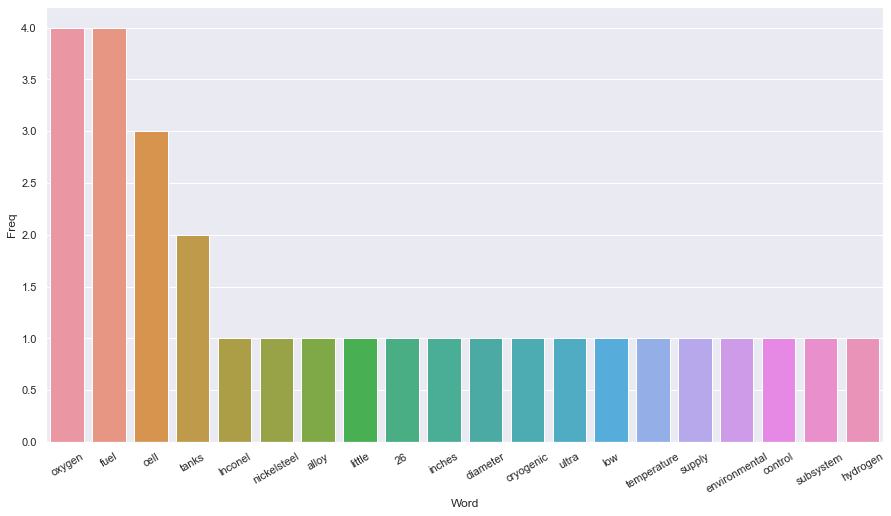

In [147]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [148]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)



tagged_words

[('The', 'DT'),
 ('oxygen', 'NN'),
 ('tanks', 'NNS'),
 ('are', 'VBP'),
 ('made', 'VBN'),
 ('of', 'IN'),
 ('lnconel', 'NN'),
 ('(', '('),
 ('a', 'DT'),
 ('nickelsteel', 'RB'),
 ('alloy', 'NN'),
 (')', ')'),
 ('and', 'CC'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('over', 'IN'),
 ('26', 'CD'),
 ('inches', 'NNS'),
 ('in', 'IN'),
 ('diameter', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('cryogenic', 'NN'),
 ('(', '('),
 ('ultra', 'JJ'),
 ('low', 'JJ'),
 ('temperature', 'NN'),
 (')', ')'),
 ('tanks', 'NNS'),
 ('supply', 'VBP'),
 ('oxygen', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('environmental', 'JJ'),
 ('control', 'NN'),
 ('subsystem', 'NN'),
 ('and', 'CC'),
 ('oxygen', 'NN'),
 ('and', 'CC'),
 ('hydrogen', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('fuel', 'NN'),
 ('cell', 'NN'),
 ('powerplants', 'NNS'),
 ('.', '.'),
 ('The', 'DT'),
 ('fuel', 'NN'),
 ('sump', 'NN'),
 ('tank', 'NN'),
 ('occupies', 'VBZ'),
 ('almost', 'RB'),
 ('all', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('space', 'NN'),


## TF-IDF

In [149]:
# num_of_words=sum(sum_words.tolist())
# num_of_words


# doc_words=cv.get_feature_names_out()

# freq=[round((i/4),3) for i in sum_words]

# len(doc_words)
# print(f'features: {doc_words}\nword counts: {sum_words}\nword frequency: {freq}')
# N=2
# num_docs_contain_word=1
# freq[0]*math.log(N/num_docs_contain_word)

In [150]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm='l2',stop_words='english')

X=vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(X)

{'oxygen': 19, 'tanks': 31, 'lnconel': 15, 'nickelsteel': 17, 'alloy': 1, 'little': 14, '26': 0, 'inches': 12, 'diameter': 6, 'cryogenic': 5, 'ultra': 33, 'low': 16, 'temperature': 32, 'supply': 29, 'environmental': 8, 'control': 4, 'subsystem': 26, 'hydrogen': 11, 'fuel': 9, 'cell': 3, 'powerplants': 21, 'sump': 27, 'tank': 30, 'occupies': 18, 'space': 25, 'sector': 23, 'eagles': 7, 'going': 10, 'super': 28, 'bowl': 2, 'year': 35, 'purge': 22, 'lines': 13, 'use': 34, 'shutoff': 24, 'powerplant': 20}
['26', 'alloy', 'bowl', 'cell', 'control', 'cryogenic', 'diameter', 'eagles', 'environmental', 'fuel', 'going', 'hydrogen', 'inches', 'lines', 'little', 'lnconel', 'low', 'nickelsteel', 'occupies', 'oxygen', 'powerplant', 'powerplants', 'purge', 'sector', 'shutoff', 'space', 'subsystem', 'sump', 'super', 'supply', 'tank', 'tanks', 'temperature', 'ultra', 'use', 'year']
[[0.35024777 0.35024777 0.         0.         0.         0.
  0.35024777 0.         0.         0.         0.         0.
  

c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [151]:
X.shape

(6, 36)